<a href="https://colab.research.google.com/github/Sparshj8287/ML_Journey/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Regression with TensorFlow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.8.2


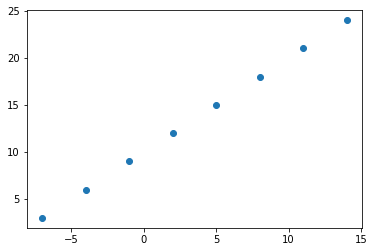

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [ ]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [ ]:
#Turn numpy array into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=9)

Epoch 1/9
1/1 [==============================] - 1s 694ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/9
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/9
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/9
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/9
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/9
1/1 [==============================] - 0s 13ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/9
1/1 [==============================] - 0s 9ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/9
1/1 [==============================] - 0s 12ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/9
1/1 [==============================] - 0s 7ms/step - loss: 10.4448 - mae: 10.4448


In [ ]:
model.predict([17.0])

array([[15.136023]], dtype=float32)

In [ ]:
# Rebuild a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(100,activation="relu")
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 430ms/step - loss: 13.2421 - mae: 13.2421
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 13.2390 - mae: 13.2390
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 13.2360 - mae: 13.2360
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 13.2329 - mae: 13.2329
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 13.2298 - mae: 13.2298
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 13.2267 - mae: 13.2267
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 13.2236 - mae: 13.2236
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 13.2205 - mae: 13.2205
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 13.2174 - mae: 13.2174
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 13.2143 - mae: 13.2143


In [ ]:
#Let see our model prediction has improved....
model.predict([17.0])

array([[1.4456155 , 0.8271602 , 0.        , 0.        , 0.18081929,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.1838437 , 0.        , 2.493413  , 0.        , 1.2246503 ,
        0.        , 2.0938737 , 2.4760432 , 0.        , 1.5951964 ,
        0.6715564 , 0.        , 2.2154577 , 0.        , 0.        ,
        2.2624447 , 1.7050949 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.5647712 , 1.6351671 ,
        2.558708  , 0.        , 0.        , 0.97121346, 0.48271888,
        0.        , 0.        , 0.        , 0.        , 0.90948975,
        0.        , 1.157558  , 0.        , 0.        , 0.        ,
        1.2861323 , 1.3447688 , 0.        , 0.        , 1.7746525 ,
        2.7084756 , 1.2435553 , 0.        , 0.3917525 , 0.        ,
        0.        , 0.        , 0.        , 2.1641042 , 0.46831977,
        0.        , 1.136497  , 0.        , 1.2771223 , 1.2397089 ,
        1.308254  , 1.9729311 , 2.8138752 , 2.53

In [ ]:
#let again rebuild a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])
#Complining a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # SGD is short for stochastic gradient descent
              metrics=["mae"])
#Fitting the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=98)

Epoch 1/98
1/1 [==============================] - 0s 358ms/step - loss: 13.6754 - mae: 13.6754
Epoch 2/98
1/1 [==============================] - 0s 11ms/step - loss: 12.7455 - mae: 12.7455
Epoch 3/98
1/1 [==============================] - 0s 11ms/step - loss: 11.8183 - mae: 11.8183
Epoch 4/98
1/1 [==============================] - 0s 12ms/step - loss: 10.8885 - mae: 10.8885
Epoch 5/98
1/1 [==============================] - 0s 13ms/step - loss: 9.9491 - mae: 9.9491
Epoch 6/98
1/1 [==============================] - 0s 19ms/step - loss: 8.9930 - mae: 8.9930
Epoch 7/98
1/1 [==============================] - 0s 9ms/step - loss: 8.0130 - mae: 8.0130
Epoch 8/98
1/1 [==============================] - 0s 12ms/step - loss: 7.0026 - mae: 7.0026
Epoch 9/98
1/1 [==============================] - 0s 11ms/step - loss: 6.7395 - mae: 6.7395
Epoch 10/98
1/1 [==============================] - 0s 8ms/step - loss: 7.1571 - mae: 7.1571
Epoch 11/98
1/1 [==============================] - 0s 11ms/step - loss: 

In [ ]:
model.predict([17.0])

array([[28.027367]], dtype=float32)

In [ ]:
#Make a biggest data set
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make label set to our dataset 
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

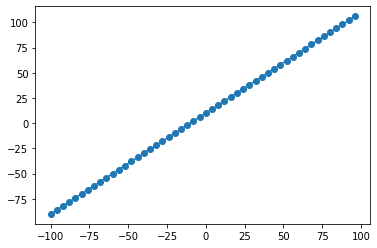

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.scatter(X,y)

In [ ]:
X_train=X[:40]#this is 80% of the data which is used to train the model 
y_train=y[:40]

X_test=X[40:]#This is 20% of the data which is used to test the model
y_test=y[40:]

In [ ]:
len(X)

50

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

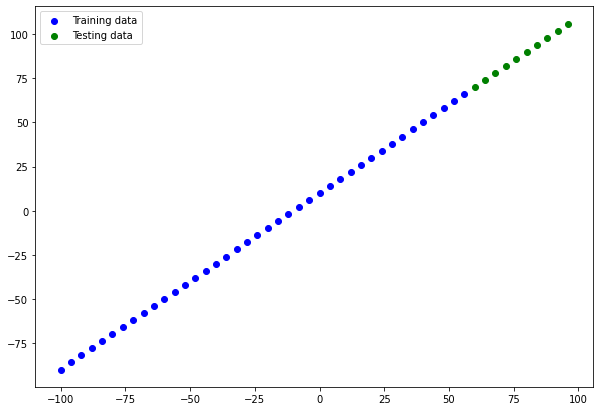

In [ ]:
plt.figure(figsize=(10, 7))
  # Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
  # Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [ ]:
#Set random seed
tf.random.set_seed(42)
# 1.Create a model
model_1=tf.keras.Sequential([
tf.keras.layers.Dense(5,input_shape=[1],name="input_layer",activation=None),
  tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.03),
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 10        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the model
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 10        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


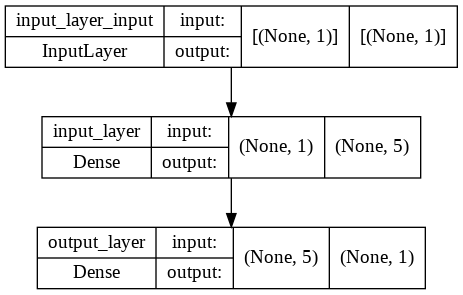

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1,show_shapes=True)

In [ ]:
y_pred=model_1.predict(X_test)
y_pred

array([[ 70.55738 ],
       [ 74.59796 ],
       [ 78.638535],
       [ 82.679115],
       [ 86.719696],
       [ 90.76028 ],
       [ 94.80086 ],
       [ 98.84142 ],
       [102.88202 ],
       [106.92259 ]], dtype=float32)

In [ ]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def predictions_plot(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="training data")
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  plt.scatter(test_data,predictions,c="r",label="predictions")
  plt.legend()


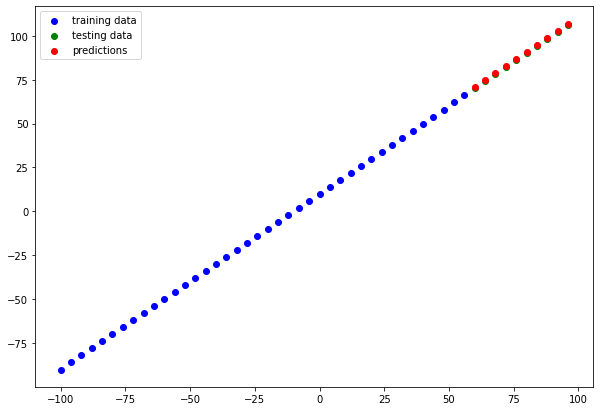

In [ ]:
predictions_plot()

In [ ]:
model_1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 396ms/step - loss: 0.7400 - mae: 0.7400


[0.7399848699569702, 0.7399848699569702]

In [ ]:
y_test,tf.reshape(y_pred,shape=[1,10]),tf.squeeze(y_pred)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[ 70.55738 ,  74.59796 ,  78.638535,  82.679115,  86.719696,
          90.76028 ,  94.80086 ,  98.84142 , 102.88202 , 106.92259 ]],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.55738 ,  74.59796 ,  78.638535,  82.679115,  86.719696,
         90.76028 ,  94.80086 ,  98.84142 , 102.88202 , 106.92259 ],
       dtype=float32)>)

In [ ]:
mae9=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.reshape(y_pred,shape=[1,10]))
mae9

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.73998564], dtype=float32)>

In [ ]:
mse9=tf.keras.metrics.mean_squared_error(y_true=y_test,
                                        y_pred=tf.reshape(y_pred,shape=[1,10]))

In [ ]:
mse9

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.5611638], dtype=float32)>

In [ ]:
(mae9)**2

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.54757875], dtype=float32)>

In [ ]:
#Make some functions to determine mean squared error and mean absolute error
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                   y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
   return tf.keras.metrics.mean_squared_error(y_true=y_true,
                                   y_pred=tf.squeeze(y_pred))

**model 2**

In [ ]:
#Set some random seed
tf.random.set_seed(42)
#Build a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
#Compile a model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")
#Fitting a model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
y_pred1=model_2.predict(X_test)
y_pred1


array([[ 70.47821 ],
       [ 75.062546],
       [ 79.64688 ],
       [ 84.23121 ],
       [ 88.815544],
       [ 93.39987 ],
       [ 97.98421 ],
       [102.568535],
       [107.15287 ],
       [111.737206]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mae1=mae(y_test,y_pred1)
mse1=mse(y_test, y_pred1)

In [ ]:
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=3.107708>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.474764>)

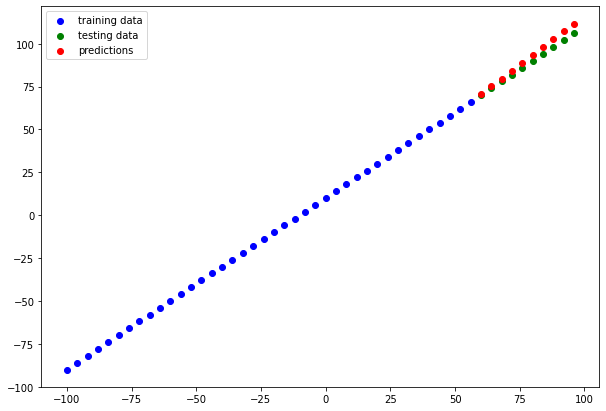

In [ ]:
predictions_plot(predictions=y_pred1)

**Model 3**

In [ ]:
#Set some random seed
tf.random.set_seed(42)
#Build a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#Compile a model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")
#Fitting a model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

In [ ]:
y_pred2=model_3.predict(X_test)

In [ ]:
y_pred2


array([[15.854742],
       [16.617329],
       [17.379915],
       [18.142504],
       [18.905092],
       [19.667677],
       [20.430264],
       [21.192854],
       [21.95544 ],
       [22.718027]], dtype=float32)

In [ ]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

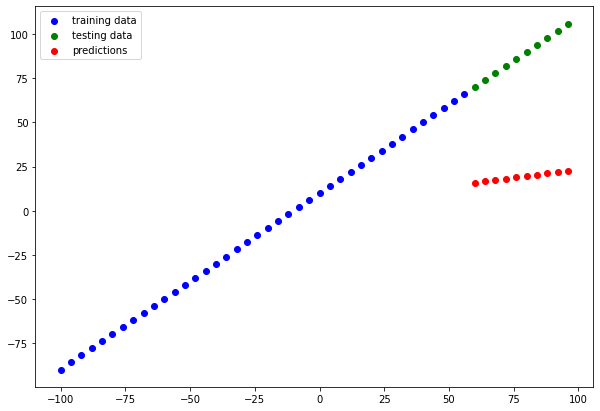

In [ ]:
predictions_plot(predictions=y_pred2)

In [ ]:
#Evaluating the model
mae2=mae(y_test,y_pred2)
mse2=mse(y_test,y_pred2)

In [ ]:
mae2,mse2


(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

#Comparing the results of our experiments

In [ ]:
#Let us compare the model result using pandas DataFrame
import pandas as pd
model_results=[["model_1",mae9.numpy(),mse9.numpy()],
               ["model_2",mae1.numpy(),mse1.numpy()],
               ["model_3",mae2.numpy(),mse2.numpy()]]


In [ ]:
all_results=pd.DataFrame(model_results, columns=["model","mae","mse"])

In [ ]:
all_results

,model,mae,mse
0,model_1,[0.73998564],[0.5611638]
1,model_2,3.107708,12.474764
2,model_3,68.713615,4808.027344


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 10        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


`looks like model 2 perform the best`

In [ ]:
#Save the model using save model format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
#Load in the saved model format
loaded_savedmodel_format=tf.keras.models.load_model("/content/best_model_SavedModel_format")

In [ ]:
loaded_savedmodel_format.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare the predictions 
model_2_preds=model_2.predict(X_test)
loaded_savedmodel_format_preds=loaded_savedmodel_format.predict(X_test)

In [ ]:
model_2_preds,
loaded_savedmodel_format_preds

array([[ 70.47821 ],
       [ 75.062546],
       [ 79.64688 ],
       [ 84.23121 ],
       [ 88.815544],
       [ 93.39987 ],
       [ 97.98421 ],
       [102.568535],
       [107.15287 ],
       [111.737206]], dtype=float32)

In [ ]:
model_2_preds==loaded_savedmodel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_h5_model=tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [ ]:
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Download a file from google colab
#from google.colab import files
#files.download("best_model_HDF5_format.h5")

##A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Convert our dataframe into one hot encoding 
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
insurance_one_hot.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [ ]:
X=insurance_one_hot.drop("charges",axis=1)

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
X


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y=insurance_one_hot["charges"]

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Create training and test spilts 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=42)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
#Build a neural network 
tf.random.set_seed(42)
#1.Create a model
insurance_model= tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=None),
    tf.keras.layers.Dense(1,activation=None)
])
#2.Compile the model 
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics="mae")
#3.Fit the model 
#insurance_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)
insurance_model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 2ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

In [ ]:
insurance_model_preds=insurance_model.predict(X_test)

In [ ]:
y_test,y_test.shape

(764      9095.06825
 887      5272.17580
 890     29330.98315
 1293     9301.89355
 259     33750.29180
            ...     
 109     47055.53210
 575     12222.89830
 535      6067.12675
 543     63770.42801
 846      9872.70100
 Name: charges, Length: 268, dtype: float64, (268,))

In [ ]:
insurance_model_preds.shape

(268, 11, 1)

In [ ]:
tf.squeeze(insurance_model_preds)

<tf.Tensor: shape=(268, 11), dtype=float32, numpy=
array([[17302.299 , 13789.632 ,  9683.397 , ...,  9329.029 ,  9329.029 ,
         9329.029 ],
       [15707.646 , 14648.087 ,  9329.029 , ...,  9506.214 ,  9329.029 ,
         9329.029 ],
       [20668.793 , 14092.616 ,  9329.029 , ...,  9506.214 ,  9329.029 ,
         9329.029 ],
       ...,
       [16062.014 , 14294.6045,  9506.214 , ...,  9329.029 ,  9329.029 ,
         9329.029 ],
       [18896.955 , 17729.312 ,  9329.029 , ...,  9329.029 ,  9506.214 ,
         9329.029 ],
       [18365.404 , 15388.716 ,  9506.214 , ...,  9329.029 ,  9329.029 ,
         9506.214 ]], dtype=float32)>

In [ ]:
len(insurance_model_preds)

268

In [ ]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


In [ ]:
#Model_2
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(X_train,y_train,epochs=500,verbose=1)

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5703 - mae: 3170.5703


[3170.5703125, 3170.5703125]

In [ ]:
#X_test,y_test# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)# Set random seed


In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

Text(0.5, 0, 'epochs')

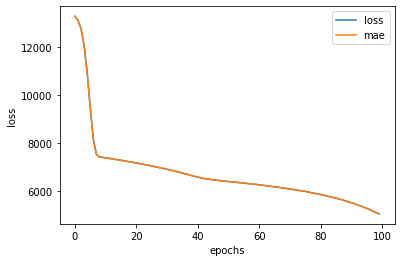

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#X_test,y_test# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=0)# Set random seed


Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13199.7266 - mae: 13199.7266
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 12889.0273 - mae: 12889.0273
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 12651.0098 - mae: 12651.0098
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 12395.2949 - mae: 12395.2949
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 12110.98

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8631.8887 - mae: 8631.8887


[8631.888671875, 8631.888671875]

In [ ]:
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

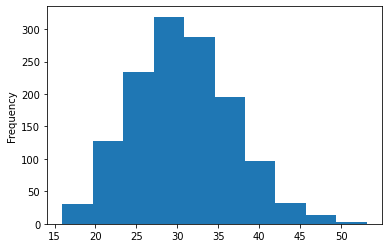

In [ ]:
X["bmi"].plot(kind="hist")

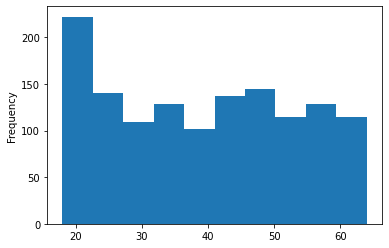

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
#Read in the insurance dataframe
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal


array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

#Make the model for our normalized data set


In [ ]:
#Build the model
tf.random.set_seed(42)
insurance_model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.01),
                          metrics=["mae"])
insurance_model_1.fit(X_train_normal,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13217.9932 - mae: 13217.9932
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11378.8047 - mae: 11378.8047
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 8112.9478 - mae: 8112.9478
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.9121 - mae: 7588.9121
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7103.4785 - mae: 7103.4785
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6513.8735 - mae: 6513.8735
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5593.9990 - mae: 5593.9990
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4434.3398 - mae: 4434.3398
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3745.8257 - mae: 3745.8257
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3679.4285 - mae: 3679.

In [ ]:
insurance_model_1.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3176.3691 - mae: 3176.3691


[3176.369140625, 3176.369140625]